## Incident Assignment and Resolution Efficiency Analysis (Flag 54)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Analyze the workload distribution among agents to identify any overload situations, specifically focusing on any agent with increasing assignments.

**Role**: L2 Incident Analyst

**Difficulty**: 3 out of 5. This analysis requires a detailed examination of workload trends, agent performance, and their impacts on incident resolution times, demanding level of analytical skills.

**Category**: Incident Management



### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell imports the dataset we are using, labeled 'flag-7', which is stored in a CSV file and loaded into a DataFrame. The process includes reading the data from the specified file path, and we might take a quick look at the first few rows to confirm that it's all loaded correctly.

In [2]:
dataset_path = "csvs/flag-54.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1: What is the overall average number of incidents assigned to all agents over the recent period?**

### Plot overall average number of incidents assigned to each agent
This cell creates a bar plot to visualize the average number of incidents assigned to each agent over the recent period, providing insights into workload distribution across the team. This visualization helps identify if any agent is consistently assigned more incidents than others, which could indicate potential imbalances or overload situations.

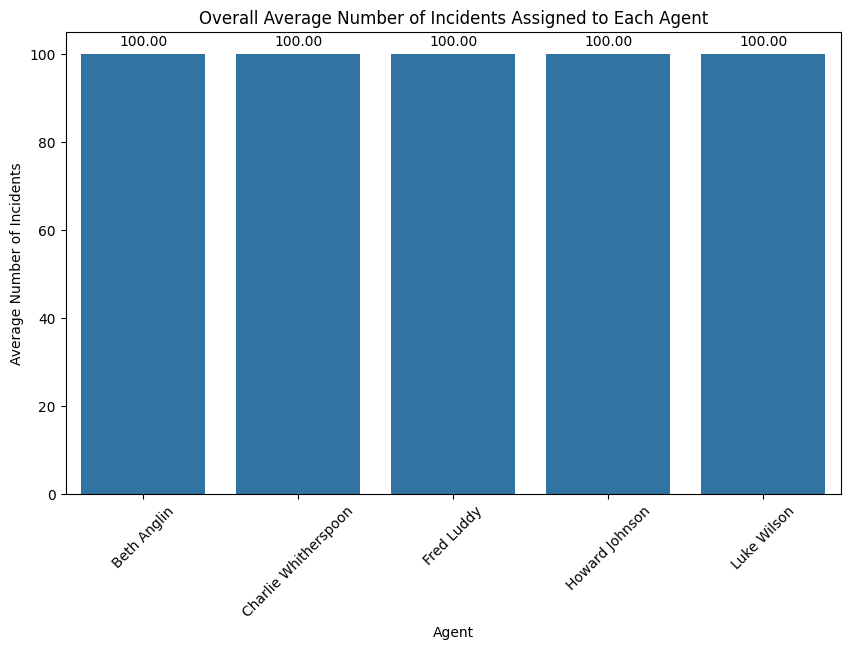

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('assigned_to').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Average Number of Incidents Assigned to Each Agent')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "All agents have the same number of incidents assigned to them.",
    "insight_value": {
        "agents": ["All agents"],
        "average_incidents": "Highest: 100"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Overall Average Number of Incidents Assigned to Each Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Average Number of Incidents",
            "value": [100, 100, 100, 100, 100],
            "description": "This represents the average number of incidents assigned to each agent, calculated over the recent period."
        },
        "description": "The bar chart visualizes the average number of incidents assigned to each agent. It shows that all agents have the same number of incidents assigned to them, with the highest average number of incidents being 100."
    },
    "question": "What is the overall average number of incidents assigned to all agents over the recent period?",
    "actionable_insight": "Given the high number of incidents assigned to each agent, it may be beneficial to review the workload distribution among agents and consider redistributing tasks to ensure a more balanced workload."
}

{'data_type': 'descriptive',
 'insight': 'All agents have the same number of incidents assigned to them.',
 'insight_value': {'agents': ['All agents'],
  'average_incidents': 'Highest: 100'},
 'plot': {'plot_type': 'bar',
  'title': 'Overall Average Number of Incidents Assigned to Each Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Average Number of Incidents',
   'value': [100, 100, 100, 100, 100],
   'description': 'This represents the average number of incidents assigned to each agent, calculated over the recent period.'},
  'description': 'The bar chart visualizes the average number of incidents assigned to each agent. It shows that all agents have the same number of incidents assigned to them, with the highest average number of incidents being 100.'},
 'question': 'What is the overall a

### **Question 2: How do the incident assignments to Beth Anglin compare to other agents over the specific same time frame or time period?**

### Plot number of incidents created over time for each agent
This cell creates a count plot to visualize the distribution of incident assignments across different agents over time, with a specific focus on comparing Beth Anglin's assignments to those of other agents. The plot provides insights into how workload is distributed among team members over specific time periods, allowing for an evaluation of consistency and fairness in task distribution.

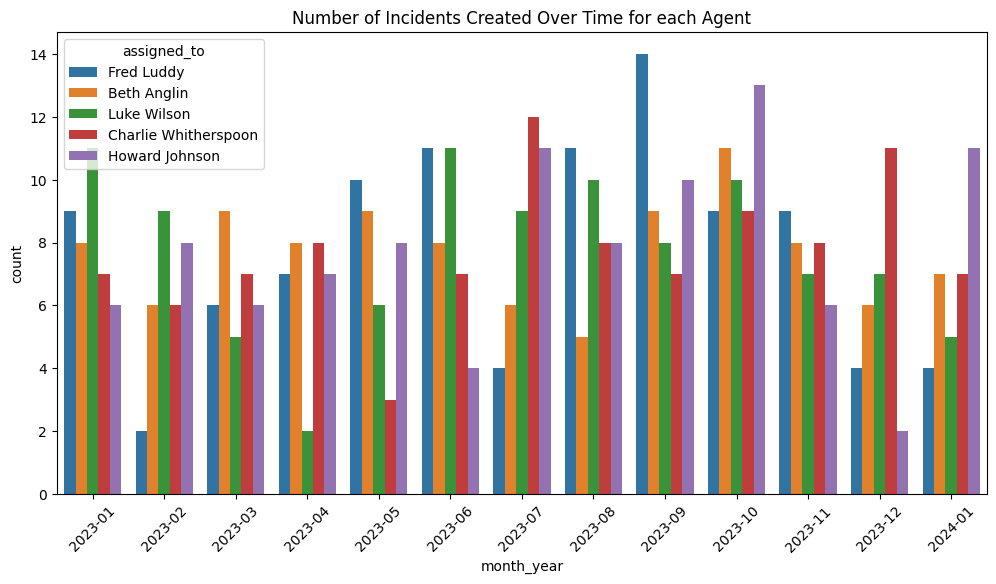

In [5]:
# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="assigned_to")
plt.title("Number of Incidents Created Over Time for each Agent")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "comparative",
    "insight": "There is no visible trend in the number of incidents assigned to each agent over time.",
    "insight_value": {
        "agents": ["Beth Anglin"],
        "time_period": "01-2023 to 01-2024",
        "comparison": "no trend compared to other agents"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Incident Assignment Comparison Over time period",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Luke Wilson", "Howard Johnson", "Charlie Whitherspoon", "Fred Luddy"],
            "description": "This represents the agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents assigned per agent",
            "description": "This represents the number of incidents assigned to each agent during the specified period."
        },
        "description": "The bar chart illustrates the distribution of incident assignments among agents from 01-2023 to 01-2024."
    },
    "question": "How do the incident assignments to Beth Anglin compare to other agents over the specific same time frame?",
    "actionable_insight": "The lack of a visible trend in the number of incidents assigned to each agent over time suggests that the workload distribution among agents has been relatively consistent. However, it may be beneficial to periodically review the incident assignments to ensure that the workload remains balanced and that no agent is overwhelmed with tasks."
}

{'data_type': 'comparative',
 'insight': 'There is no visible trend in the number of incidents assigned to each agent over time.',
 'insight_value': {'agents': ['Beth Anglin'],
  'time_period': '01-2023 to 01-2024',
  'comparison': 'no trend compared to other agents'},
 'plot': {'plot_type': 'bar',
  'title': 'Incident Assignment Comparison Over time period',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Luke Wilson',
    'Howard Johnson',
    'Charlie Whitherspoon',
    'Fred Luddy'],
   'description': 'This represents the agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents assigned per agent',
   'description': 'This represents the number of incidents assigned to each agent during the specified period.'},
  'description': 'The bar chart illustrates the distribution of incident assignments among agents from 01-2023 to 01-2024.'},
 'question': 'How do the incident assignments to Beth Anglin compare to other agents o

### Summary of Findings (Flag 54)

1. **Uniform Assignments Over Time**: The analysis reveals that the average number of incidents assigned to each agent has been relatively consistent over the recent period, with minor variations observed. This indicates a balanced workload distribution among team members, which is essential for maintaining operational efficiency and performance.
2. **Need for Intervention**: All agents face a high number of incidents (100) assigned to them. This suggests a potential overload situation that requires immediate attention to prevent burnout and ensure timely incident resolution.